# Big Mart Sales Prediction


# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Variable Description

Item_Identifier - Unique product ID

Item_Weight - Weight of product

Item_Fat_Content - Whether the product is low fat or not

Item_Visibility - The % of total display area of all products in a store allocated to the particular product

Item_Type - The category to which the product belongs

Item_MRP - Maximum Retail Price (list price) of the product

Outlet_Identifier - Unique store ID

Outlet_Establishment_Year - The year in which store was established

Outlet_Size - The size of the store in terms of ground area covered

Outlet_Location_Type - The type of city in which the store is located

Outlet_Type - Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales - Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as skt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import math

In [159]:
sales = pd.read_csv("train_kOBLwZA.csv")

In [19]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [78]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [99]:
sales["Item_Fat_Content"].replace(to_replace=['Low Fat','low fat', 'LF'], value="Low_Fat", inplace=True) 
# replacing the same values with different names in a variable to narrow the unique values to one.

In [83]:
sales["Item_Fat_Content"].replace(to_replace=['Regular', 'reg'], value="Regular", inplace=True)

In [110]:
sales["Outlet_Type"].replace(to_replace=['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'], value="SuperMarket", inplace=True)

C:\Users\zaina\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\zaina\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


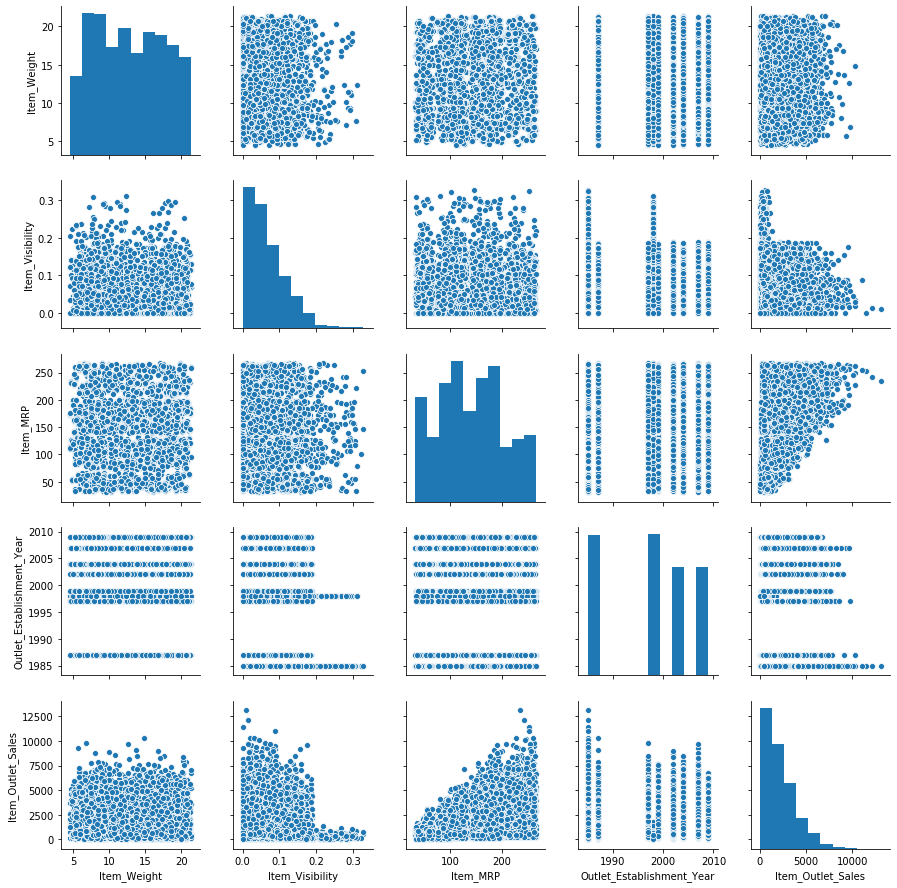

In [196]:
sns.pairplot(sales)

In [119]:
sales["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [48]:
print(sales["Item_Type"].nunique())
print(sales["Outlet_Identifier"].nunique())
print(sales["Outlet_Establishment_Year"].nunique())
print(sales["Item_Fat_Content"].nunique())
print(sales["Outlet_Location_Type"].nunique())
print(sales["Outlet_Type"].nunique())
print(sales["Outlet_Size"].nunique())

16
10
9
5
3
4
3


In [49]:
sales["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

AxesSubplot(0.125,0.125;0.775x0.755)


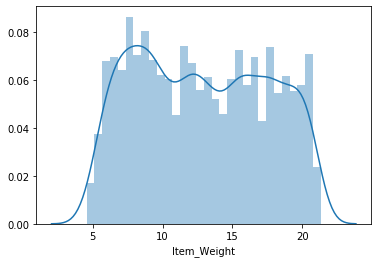

In [37]:
print(sns.distplot(sales["Item_Weight"],bins=30 ))


AxesSubplot(0.125,0.125;0.775x0.755)


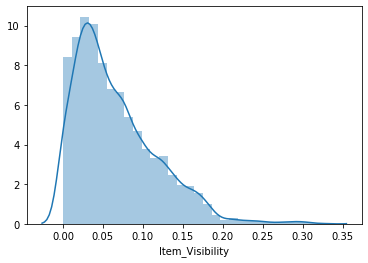

In [38]:
print(sns.distplot(sales["Item_Visibility"],bins=30 ))

AxesSubplot(0.125,0.125;0.775x0.755)


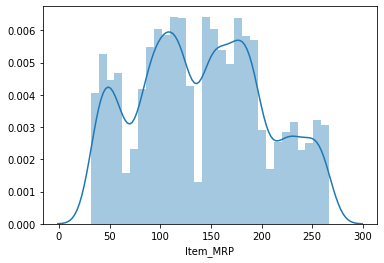

In [39]:
print(sns.distplot(sales["Item_MRP"],bins=30 ))

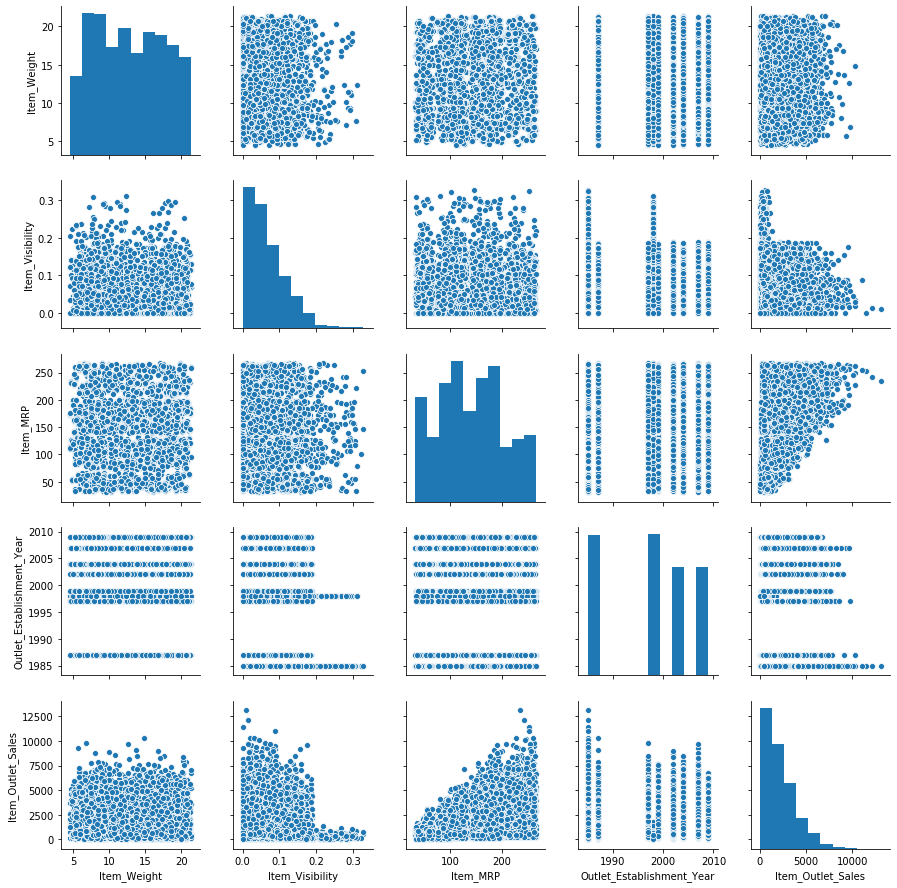

In [40]:
print(sns.pairplot(data=sales))

In [41]:
sales.corr() # No multi colinearity between numerical input variables. 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


# Creating Dummies for categorical variables

In [50]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [120]:
col_dummies = pd.get_dummies(sales[["Item_Fat_Content","Outlet_Type", "Outlet_Location_Type", "Outlet_Size"]], prefix=["Fat", " ", "City", "Size"])

In [121]:
col_dummies

,Fat_Low_Fat,Fat_Regular,_Grocery Store,_SuperMarket,City_Tier 1,City_Tier 2,City_Tier 3,Size_High,Size_Medium,Size_Small
0,1,0,0,1,1,0,0,0,1,0
1,0,1,0,1,0,0,1,0,1,0
2,1,0,0,1,1,0,0,0,1,0
3,0,1,1,0,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,1,0,0,1,1,0,0
8519,0,1,0,1,0,1,0,0,0,0
8520,1,0,0,1,0,1,0,0,0,1
8521,0,1,0,1,0,0,1,0,1,0


In [125]:
new_sales = pd.concat([sales, col_dummies], axis=1)


In [128]:
new_sales.drop(["Item_Fat_Content","Outlet_Type", "Outlet_Location_Type", "Outlet_Size"], axis=1, inplace=True)

In [129]:
new_sales.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Fat_Low_Fat,Fat_Regular,_Grocery Store,_SuperMarket,City_Tier 1,City_Tier 2,City_Tier 3,Size_High,Size_Medium,Size_Small
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,1,0,0,1,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0,1,0,1,0,0,1,0,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,1,0,0,1,1,0,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0,1,1,0,0,0,1,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,1,0,0,1,0,0,1,1,0,0


# Filling Missing Values

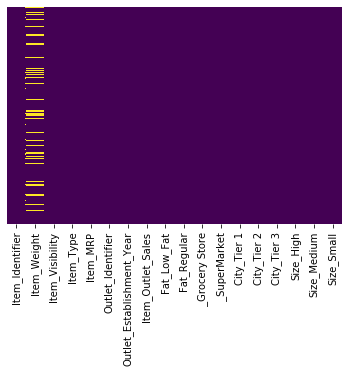

In [174]:
sns.heatmap(new_sales.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Missing Values found in Item_Wwight

In [188]:
new_sales["Item_Weight"].fillna(value=new_sales["Item_Weight"].median(), inplace=True)

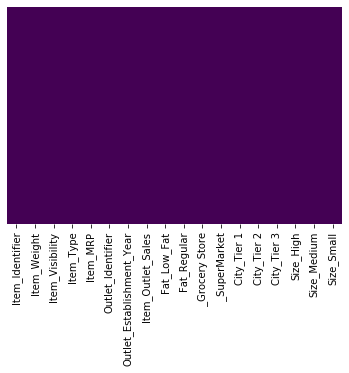

In [189]:
sns.heatmap(new_sales.isnull(),yticklabels=False,cbar=False,cmap='viridis')

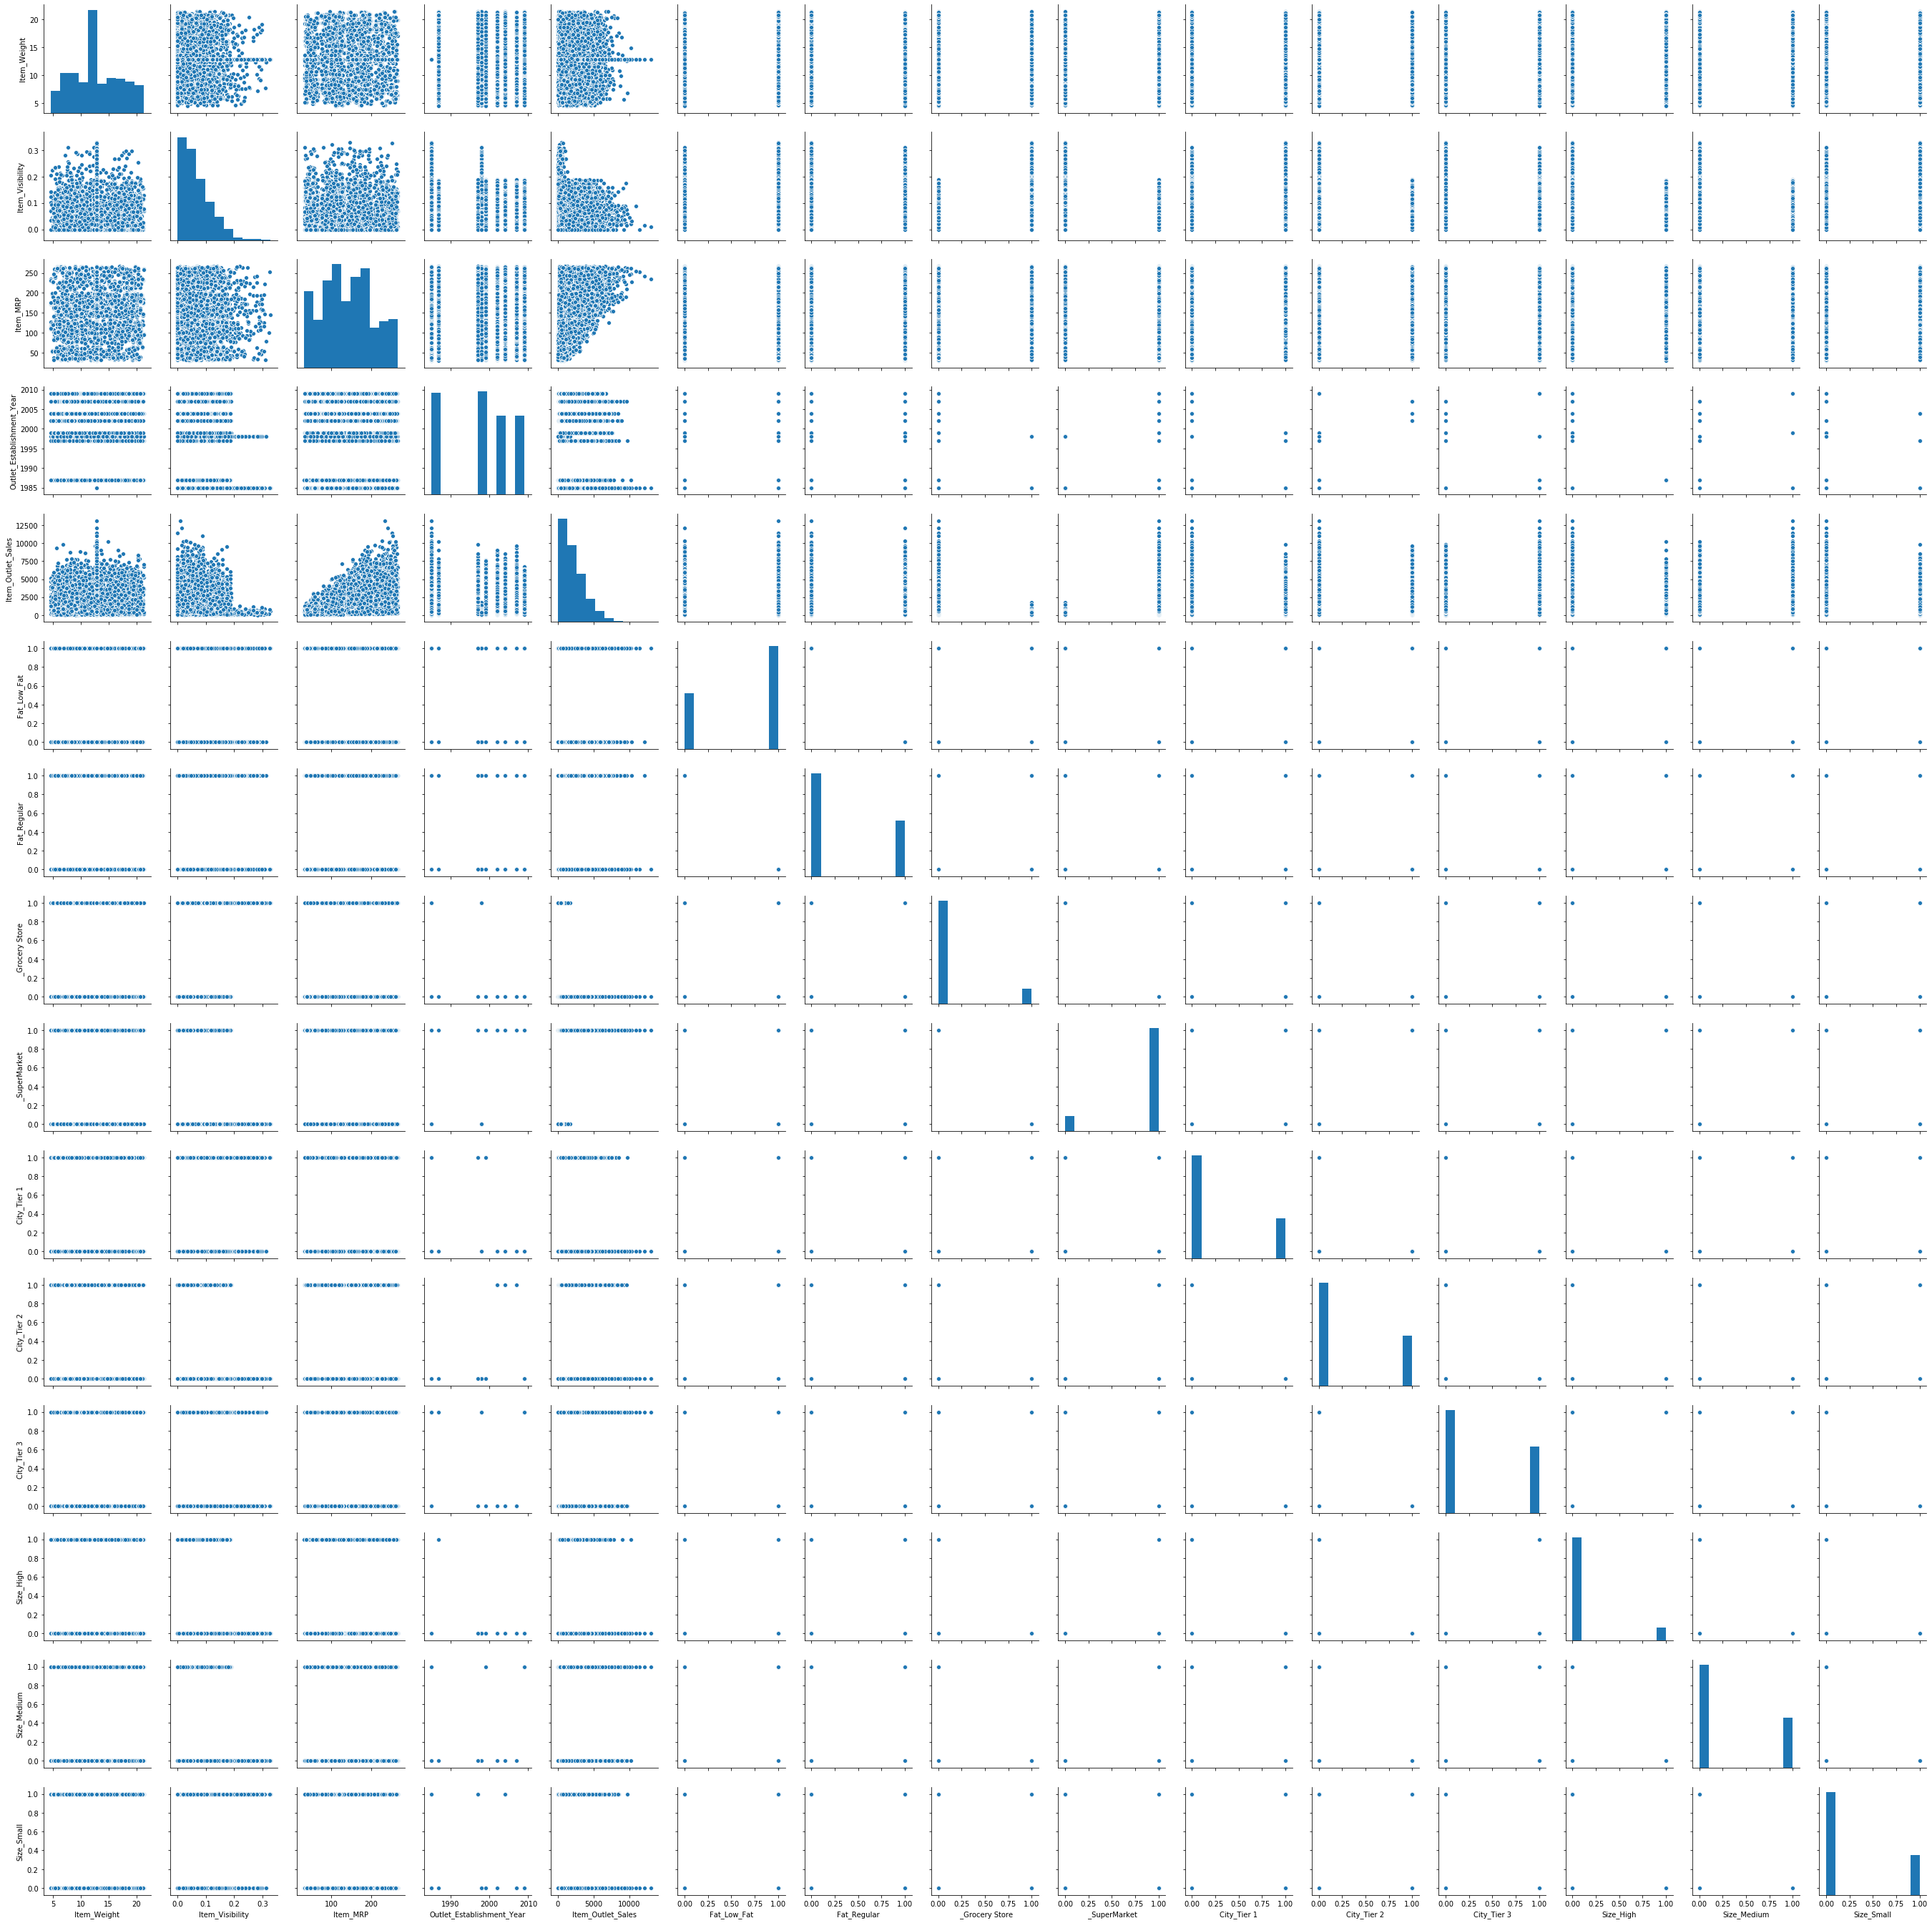

In [195]:
sns.pairplot(new_sales)

# Checking the linear relationship b/w dummy i/p and o/p variables

In [182]:
new_sales[['Fat_Low_Fat', 'Fat_Regular', ' _Grocery Store',
       ' _SuperMarket', 'City_Tier 1', 'City_Tier 2', 'City_Tier 3',
       'Size_High', 'Size_Medium', 'Size_Small','Item_Outlet_Sales']].corr()

,Fat_Low_Fat,Fat_Regular,_Grocery Store,_SuperMarket,City_Tier 1,City_Tier 2,City_Tier 3,Size_High,Size_Medium,Size_Small,Item_Outlet_Sales
Fat_Low_Fat,1.000000,-1.000000,0.002924,-0.002924,-0.003155,0.003272,-0.000241,0.002132,-0.004671,0.002313,-0.018719
Fat_Regular,-1.000000,1.000000,-0.002924,0.002924,0.003155,-0.003272,0.000241,-0.002132,0.004671,-0.002313,0.018719
_Grocery Store,0.002924,-0.002924,1.000000,-1.000000,0.176158,-0.265803,0.093276,-0.133686,-0.266370,0.176158,-0.411727
_SuperMarket,-0.002924,0.002924,-1.000000,1.000000,-0.176158,0.265803,-0.093276,0.133686,0.266370,-0.176158,0.411727
City_Tier 1,-0.003155,0.003155,0.176158,-0.176158,1.000000,-0.434653,-0.502066,-0.218609,0.082072,0.458964,-0.111287
City_Tier 2,0.003272,-0.003272,-0.265803,0.265803,-0.434653,1.000000,-0.560639,-0.244113,-0.486397,0.083381,0.058261
City_Tier 3,-0.000241,0.000241,0.093276,-0.093276,-0.502066,-0.560639,1.000000,0.435419,0.391617,-0.502066,0.046376
Size_High,0.002132,-0.002132,-0.133686,0.133686,-0.218609,-0.244113,0.435419,1.000000,-0.244634,-0.218609,0.024170
Size_Medium,-0.004671,0.004671,-0.266370,0.266370,0.082072,-0.486397,0.391617,-0.244634,1.000000,-0.435580,0.204701
Size_Small,0.002313,-0.002313,0.176158,-0.176158,0.458964,0.083381,-0.502066,-0.218609,-0.435580,1.000000,-0.098403


# Distributing right skewed data into normal

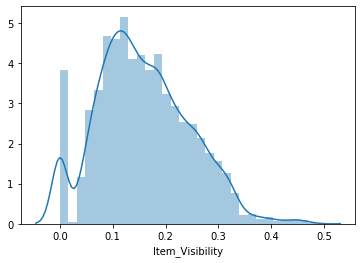

In [224]:
sns.distplot((new_sales["Item_Visibility"]**0.65),bins=30)

In [280]:
item_Viz = ((new_Sales["Item_Visibility"]**0.60))

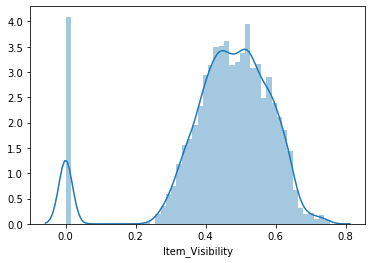

In [281]:
sns.distplot(item_Viz)

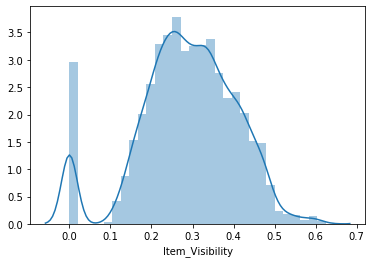

In [270]:
sns.distplot(new_Sales["Item_Visibility"], bins=30)

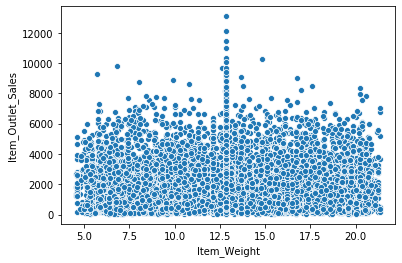

In [231]:
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales", data=new_sales)

In [243]:
new_sales.drop("Item_Type", axis=1, inplace=True)

In [244]:
new_sales.head()

,Item_Weight,Item_MRP,Item_Outlet_Sales,Fat_Low_Fat,Fat_Regular,_Grocery Store,_SuperMarket,City_Tier 1,City_Tier 2,City_Tier 3,Size_High,Size_Medium,Size_Small
0,9.30,249.8092,3735.1380,1,0,0,1,1,0,0,0,1,0
1,5.92,48.2692,443.4228,0,1,0,1,0,0,1,0,1,0
2,17.50,141.6180,2097.2700,1,0,0,1,1,0,0,0,1,0
3,19.20,182.0950,732.3800,0,1,1,0,0,0,1,0,0,0
4,8.93,53.8614,994.7052,1,0,0,1,0,0,1,1,0,0


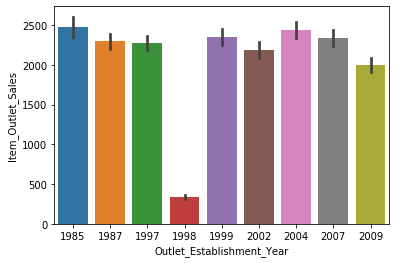

In [237]:
sns.barplot(x="Outlet_Establishment_Year",y= "Item_Outlet_Sales", data=new_sales)

# Creating a Linear Regression Model 

In [183]:
inp = new_sales[['Item_Weight', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year',
        'Fat_Low_Fat', 'Fat_Regular', ' _Grocery Store',
       ' _SuperMarket', 'City_Tier 1', 'City_Tier 2', 'City_Tier 3',
       'Size_High', 'Size_Medium', 'Size_Small']]

inp = sm.add_constant(inp)

out = new_sales["Item_Outlet_Sales"]

C:\Users\zaina\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Raw Model with all input variables

In [186]:
Model1 = LinearRegression()
Model1 = sm.OLS(out, inp).fit()

Model1_predictions = Model1.predict(inp)
Model1_summary = Model1.summary()

In [187]:
print(Model1_summary)

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     971.0
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:09:50   Log-Likelihood:                -72058.
No. Observations:                8523   AIC:                         1.441e+05
Df Residuals:                    8511   BIC:                         1.442e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Creating a model after changes to the variables

In [282]:
new_Sales.columns

Index(['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'Fat_Low_Fat',
       'Fat_Regular', ' _Grocery Store', ' _SuperMarket', 'City_Tier 1',
       'City_Tier 2', 'City_Tier 3', 'Size_High', 'Size_Medium', 'Size_Small',
       'Item_Visibility'],
      dtype='object')

In [283]:
inp = new_Sales[['Item_Weight', 'Item_MRP', 'Fat_Low_Fat',
       'Fat_Regular', ' _Grocery Store', ' _SuperMarket', 'City_Tier 1',
       'City_Tier 2', 'City_Tier 3', 'Size_High', 'Size_Medium', 'Size_Small','Item_Visibility']]

inp = sm.add_constant(inp)

out = new_sales["Item_Outlet_Sales"]

C:\Users\zaina\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [284]:
Model2 = LinearRegression()
Model2 = sm.OLS(out, inp).fit()

Model2_predictions = Model2.predict(inp)
Model2_summary = Model2.summary()

In [285]:
print(Model2_summary)


                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     872.3
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:10:51   Log-Likelihood:                -72517.
No. Observations:                8523   AIC:                         1.451e+05
Df Residuals:                    8512   BIC:                         1.451e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -373.8756     28.750    -